# Estimation of bootstrap covariances for galaxy-forest cross-correlation
We randomly resample (with replacement) both the galaxy positios and Ly-a forest pixels.

*** this version runs one of them a few times to test the covariance ***

### Read in galaxy positions and forest pixels.

In [7]:
import numpy as np
import copy
import time as time
import lyafxcorr_kg as xcorr

# Set up matplotlib and use a nicer set of plot parameters
%config InlineBackend.rc = {}
import matplotlib as mpl
mpl.rc('mathtext',fontset='stixsans')
mpl.rc('figure', facecolor="white")
#matplotlib.rc_file("../../templates/matplotlibrc")
import matplotlib.pyplot as plt
#import matplotlib.colors as colors
%matplotlib inline

from astropy.cosmology import FlatLambdaCDM
from astropy.io import fits
from astropy.io import ascii
from astropy.table import Table
from astropy import units as u
from astropy.coordinates import SkyCoord


# Define cosmology
cosmo = FlatLambdaCDM(H0=70, Om0=0.31)
    
# Read forest pixels    
LyaPix = xcorr.lyapix("pixel_radecz.bin",cosmo=cosmo)

print("Read in %i Ly-a forest pixels" % LyaPix.npix)
npix = LyaPix.npix

# Done with forest pixels. Now read galaxy positions
galfil = '/global/homes/k/kheegan/crosscorr2017/cat_galxcorr_cl2017.dat'
gal = ascii.read(galfil)
#print(gal.columns)

#gal_3d = gal[gal['source'] == '3DHST']
#gal_zD = gal[gal['source'] == 'zDEEP']
gal_mosdef = gal[gal['source'] == 'MOSDEF']
#gal_vuds   = gal[gal['source']=='VUDS']
#gal_clamato=gal[gal['source']=='CLAMATO']

#print('Read in %i 3D-HST galaxies, %i zCOSMOS-Deep galaxies, %i MOSDEF galaxies,' 
#      '%i VUDS galaxies, %i CLAMATO galaxies' % 
#      (len(gal_3d), len(gal_zD), len(gal_mosdef), len(gal_vuds), len(gal_clamato)) )

print('Read in {:d} galaxies'.format(len(gal_mosdef)))

# Convert to 3D Sky positions
#Coord_3d     = SkyCoord(ra=gal_3d['ra'] * u.degree, dec=gal_3d['dec'] * u.degree,
#                  distance=cosmo.comoving_distance(gal_3d['zspec']))
#Coord_zD     = SkyCoord(ra=gal_zD['ra'] * u.degree, dec=gal_zD['dec'] * u.degree,
#                   distance=cosmo.comoving_distance(gal_zD['zspec']))
#Coord_vuds     = SkyCoord(ra=gal_vuds['ra'] * u.degree, dec=gal_vuds['dec'] * u.degree,
#                   distance=cosmo.comoving_distance(gal_vuds['zspec']))
Coord_mosdef = SkyCoord(ra=gal_mosdef['ra'] * u.degree, dec=gal_mosdef['dec'] * u.degree,
                   distance=cosmo.comoving_distance(gal_mosdef['zspec']))
#Coord_clamato = SkyCoord(ra=gal_clamato['ra'] * u.degree, dec=gal_clamato['dec'] * u.degree,
#                   distance=cosmo.comoving_distance(gal_clamato['zspec']))

# Read in bin edges
PiBin_fil = 'bins16_pi_0-40hMpc.txt'
SigBin_fil = 'bins10_sigma_0-30hMpc.txt'

PiBins0 = ascii.read(PiBin_fil)
SigBins0 = ascii.read(SigBin_fil)

PiEdges = PiBins0['pi_edges'].data
SigEdges = SigBins0['sigma_edges'].data

# Convert bin boundaries from Mpc/h to Mpc
PiEdges  = PiEdges/(len(PiEdges)*[cosmo.h])
SigEdges = SigEdges/(len(SigEdges)*[cosmo.h])
PiBound = (min(PiEdges), max(PiEdges) )

Read in 89974 Ly-a forest pixels
Read in 121 galaxies


Compute the covariance matrix. We compare the diagonal terms with the variance as a sanity check. 

### Bootstrap MOSDEF Sample

In [76]:
nsamp=1500
np.random.seed(seed=2233456)

GalCoords = Coord_mosdef
ngal = len(GalCoords)

# Initialize output array to store all the bootstrap samples
XCorrSamples_mosdef = np.empty([len(SigEdges)-1, len(PiEdges)-1, nsamp])

# This is the loop over the desired resamples
for ii in range(0,nsamp):
    if (ii % 5) == 0:
        print("Iteration #", ii)
    # Make a copy of the pixels and resample
    LyaPixTmp = copy.deepcopy(LyaPix)
    LyaPixTmp = LyaPixTmp.resample()
    # Resample galaxy positions
    GalCoordTmp = GalCoords[np.random.choice(ngal,ngal,replace=True)]
    XCorrTmp, _ = xcorr.xcorr_gal_lya(GalCoordTmp, LyaPixTmp,SigEdges, PiEdges,
                                      cosmo=cosmo,verbose=0)
    XCorrSamples_mosdef[:,:,ii] = XCorrTmp

# First, reshape the bootstrap samples so that it has dimensions (nbin, nsamp)
XBootReshaped = XCorrSamples_mosdef.reshape(-1, XCorrSamples_mosdef.shape[-1])
Covar_mosdef = np.cov(XBootReshaped)

np.save("covar_mosdef_n1500.npy", Covar_mosdef)
np.save("bootsamp_mosdef_n1500.npy", XCorrSamples_mosdef)

Covar1 = Covar_mosdef

Iteration # 0
Iteration # 5
Iteration # 10
Iteration # 15
Iteration # 20
Iteration # 25
Iteration # 30
Iteration # 35
Iteration # 40
Iteration # 45
Iteration # 50
Iteration # 55
Iteration # 60
Iteration # 65
Iteration # 70
Iteration # 75
Iteration # 80
Iteration # 85
Iteration # 90
Iteration # 95
Iteration # 100
Iteration # 105
Iteration # 110
Iteration # 115
Iteration # 120
Iteration # 125
Iteration # 130
Iteration # 135
Iteration # 140
Iteration # 145
Iteration # 150
Iteration # 155
Iteration # 160
Iteration # 165
Iteration # 170
Iteration # 175
Iteration # 180
Iteration # 185
Iteration # 190
Iteration # 195
Iteration # 200
Iteration # 205
Iteration # 210
Iteration # 215
Iteration # 220
Iteration # 225
Iteration # 230
Iteration # 235
Iteration # 240
Iteration # 245
Iteration # 250
Iteration # 255
Iteration # 260
Iteration # 265
Iteration # 270
Iteration # 275
Iteration # 280
Iteration # 285
Iteration # 290
Iteration # 295
Iteration # 300
Iteration # 305
Iteration # 310
Iteration # 31

# Initialize output array to store all the bootstrap samples
XCorrSamples_mosdef = np.empty([len(SigEdges)-1, len(PiEdges)-1, nsamp])

# This is the loop over the desired resamples
for ii in range(0,nsamp):
    if (ii % 5) == 0:
        print("Iteration #", ii)
    # Make a copy of the pixels and resample
    LyaPixTmp = copy.deepcopy(LyaPix)
    LyaPixTmp = LyaPixTmp.resample()
    # Resample galaxy positions
    GalCoordTmp = GalCoords[np.random.choice(ngal,ngal,replace=True)]
    XCorrTmp, _ = xcorr.xcorr_gal_lya(GalCoordTmp, LyaPixTmp,SigEdges, PiEdges,
                                      cosmo=cosmo,verbose=0)
    XCorrSamples_mosdef[:,:,ii] = XCorrTmp

# First, reshape the bootstrap samples so that it has dimensions (nbin, nsamp)
XBootReshaped = XCorrSamples_mosdef.reshape(-1, XCorrSamples_mosdef.shape[-1])
Covar_mosdef = np.cov(XBootReshaped)

np.save("covar_mosdef_n400_2.npy", Covar_mosdef)
np.save("bootsamp_mosdef_n400_2.npy", XCorrSamples_mosdef)

Covar2 = Covar_mosdef

# Initialize output array to store all the bootstrap samples
XCorrSamples_mosdef = np.empty([len(SigEdges)-1, len(PiEdges)-1, nsamp])

# This is the loop over the desired resamples
for ii in range(0,nsamp):
    if (ii % 5) == 0:
        print("Iteration #", ii)
    # Make a copy of the pixels and resample
    LyaPixTmp = copy.deepcopy(LyaPix)
    LyaPixTmp = LyaPixTmp.resample()
    # Resample galaxy positions
    GalCoordTmp = GalCoords[np.random.choice(ngal,ngal,replace=True)]
    XCorrTmp, _ = xcorr.xcorr_gal_lya(GalCoordTmp, LyaPixTmp,SigEdges, PiEdges,
                                      cosmo=cosmo,verbose=0)
    XCorrSamples_mosdef[:,:,ii] = XCorrTmp

# First, reshape the bootstrap samples so that it has dimensions (nbin, nsamp)
XBootReshaped = XCorrSamples_mosdef.reshape(-1, XCorrSamples_mosdef.shape[-1])
Covar_mosdef = np.cov(XBootReshaped)

np.save("covar_mosdef_n400_3.npy", Covar_mosdef)
np.save("bootsamp_mosdef_n400_3.npy", XCorrSamples_mosdef)

Covar3 = Covar_mosdef

# Initialize output array to store all the bootstrap samples
XCorrSamples_mosdef = np.empty([len(SigEdges)-1, len(PiEdges)-1, nsamp])

# This is the loop over the desired resamples
for ii in range(0,nsamp):
    if (ii % 5) == 0:
        print("Iteration #", ii)
    # Make a copy of the pixels and resample
    LyaPixTmp = copy.deepcopy(LyaPix)
    LyaPixTmp = LyaPixTmp.resample()
    # Resample galaxy positions
    GalCoordTmp = GalCoords[np.random.choice(ngal,ngal,replace=True)]
    XCorrTmp, _ = xcorr.xcorr_gal_lya(GalCoordTmp, LyaPixTmp,SigEdges, PiEdges,
                                      cosmo=cosmo,verbose=0)
    XCorrSamples_mosdef[:,:,ii] = XCorrTmp

# First, reshape the bootstrap samples so that it has dimensions (nbin, nsamp)
XBootReshaped = XCorrSamples_mosdef.reshape(-1, XCorrSamples_mosdef.shape[-1])
Covar_mosdef = np.cov(XBootReshaped)

np.save("covar_mosdef_n400_4.npy", Covar_mosdef)
np.save("bootsamp_mosdef_n400_4.npy", XCorrSamples_mosdef)

Covar4 = Covar_mosdef

XCorr_mosdef = np.load("xcorr_mosdef_v0.npy")
XNull_mosdef  = np.load("xcorr_rand_mosdef_v0.npy")
DeltaVec = XCorr_mosdef.reshape(XCorr_mosdef.size) - XNull_mosdef.reshape(XNull_mosdef.size)

# Read in bin edges
PiBin_fil = 'bins16_pi_0-40hMpc.txt'
SigBin_fil = 'bins10_sigma_0-30hMpc.txt'

PiBins0 = ascii.read(PiBin_fil)
SigBins0 = ascii.read(SigBin_fil)

PiEdges = PiBins0['pi_edges'].data
SigEdges = SigBins0['sigma_edges'].data

# Convert bin boundaries from Mpc/h to Mpc
PiEdges  = PiEdges/(len(PiEdges)*[cosmo.h])
SigEdges = SigEdges/(len(SigEdges)*[cosmo.h])

# Calculate significance w.r.t. null with the different covariances

# Round 1
Cov = Covar1
InvCov = np.linalg.pinv(Cov)

minusLogL = 0.5 * np.dot(DeltaVec.transpose(), np.dot(InvCov, DeltaVec))

print("Detection significance = %f sigma" % np.sqrt(minusLogL))
signif1 = np.sqrt(minusLogL)

#Round 2
Cov = Covar2
InvCov = np.linalg.pinv(Cov)

minusLogL = 0.5 * np.dot(DeltaVec.transpose(), np.dot(InvCov, DeltaVec))

print("Detection significance = %f sigma" % np.sqrt(minusLogL))
signif2 = np.sqrt(minusLogL)

# Round 3
Cov = Covar3
InvCov = np.linalg.pinv(Cov)

minusLogL = 0.5 * np.dot(DeltaVec.transpose(), np.dot(InvCov, DeltaVec))

print("Detection significance = %f sigma" % np.sqrt(minusLogL))
signif3 = np.sqrt(minusLogL)

#Round 4
Cov = Covar4
InvCov = np.linalg.pinv(Cov)

minusLogL = 0.5 * np.dot(DeltaVec.transpose(), np.dot(InvCov, DeltaVec))

print("Detection significance = %f sigma" % np.sqrt(minusLogL))
signif4 = np.sqrt(minusLogL)

Detection significance (diagonal only) = 10.621940 sigma
Detection significance (diagonal only) = 10.508537 sigma
Detection significance (diagonal only) = 10.416728 sigma
(144, 2400)
Detection significance (full sample and covariance)= 9.859670 sigma


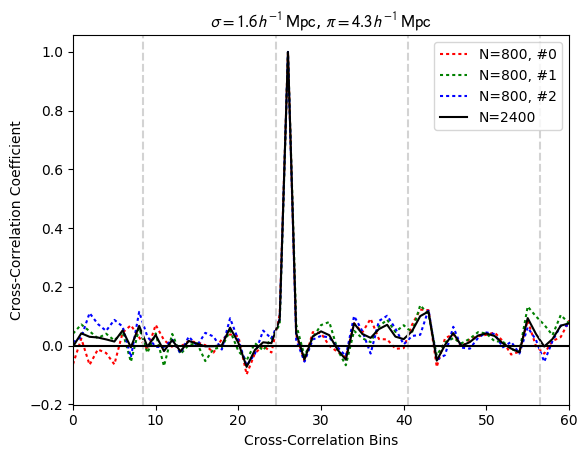

In [13]:
import numpy as np
from astropy.io import ascii

mpcstr = r'$h^{-1}\,\mathrm{Mpc}$'

XCorr_mosdef = np.load("xcorr_mosdef_v0.npy")
XNull_mosdef  = np.load("xcorr_rand_mosdef_v0.npy")
DeltaVec = XCorr_mosdef.reshape(XCorr_mosdef.size) - XNull_mosdef.reshape(XNull_mosdef.size)

# Read in bin edges
PiBin_fil = 'bins16_pi_0-40hMpc.txt'
SigBin_fil = 'bins10_sigma_0-30hMpc.txt'

PiBins0 = ascii.read(PiBin_fil)
SigBins0 = ascii.read(SigBin_fil)

PiEdges = PiBins0['pi_edges'].data
SigEdges = SigBins0['sigma_edges'].data

# Convert bin boundaries from Mpc/h to Mpc
PiEdges  = PiEdges/(len(PiEdges)*[cosmo.h])
SigEdges = SigEdges/(len(SigEdges)*[cosmo.h])

# These are the actual bin centers
PiBins = np.empty(len(PiEdges)-1)
for i in np.arange(len(PiBins)):
    PiBins[i] = (PiEdges[i]+PiEdges[i+1])/2.

SigBins = np.empty(len(SigEdges)-1)
for j in np.arange(len(SigBins)):
    SigBins[j] = (SigEdges[j]+SigEdges[j+1])/2.

XCorrSamples_mosdef = np.load("bootsamp_mosdef_n2400_mpitest.npy")

# Pick one bin to plot the covariances
showbin = 26
showbin2d = np.unravel_index(showbin,(9,16)) #2D bin index

fig, ax = plt.subplots()
color_arr = ['r','g','b','c','y','m']
for i in np.arange(3):
    XCorrSamples_tmp = XCorrSamples_mosdef[:,:,(i*800):(i*800+800)]
    XSampTmp = XCorrSamples_tmp.reshape(-1, XCorrSamples_tmp.shape[-1])
    #print(np.shape(XSampTmp))
    Covar_tmp1 = np.cov(XSampTmp,ddof=0)
    Coeff_tmp1 = np.corrcoef(XSampTmp, ddof=0)
    ax.plot(Coeff_tmp1[showbin,:], color=color_arr[i], linestyle=':',
            label='N=800, #{}'.format(i))
    #print("Max Covariance is in element: {}".format(np.unravel_index(
    #    np.argmax(Covar_tmp1),(144,144))))
    # This is the matrix with the diagonal variances
    Covar_dummy = Covar_tmp1 # np.diag(np.diag(Covar_tmp1))
    InvCovTmp1 = np.linalg.pinv(Covar_dummy)
    minusLogL = 0.5 * np.dot(DeltaVec.transpose(), np.dot(InvCovTmp1, DeltaVec))
    print("Detection significance (diagonal only) = %f sigma" % np.sqrt(minusLogL))
    
XCorrSamples_tmp = XCorrSamples_mosdef[:,:,:2400]
XSampTmp = XCorrSamples_tmp.reshape(-1, XCorrSamples_tmp.shape[-1])
print(np.shape(XSampTmp))
Covar_tmp1 = np.cov(XSampTmp,ddof=0)
Coeff_tmp1 = np.corrcoef(XSampTmp, ddof=0)
ax.plot(Coeff_tmp1[showbin,:], color='black',label='N=2400')
Covar_dummy = np.diag(np.diag(Covar_tmp1))

# Covariance assume only diagonal; for full set of realizations
#InvCovTmp1 = np.linalg.pinv(Covar_dummy)
#minusLogL = 0.5 * np.dot(DeltaVec.transpose(), np.dot(InvCovTmp1, DeltaVec))
#print("Detection significance (diagonal only)= %f sigma" % np.sqrt(minusLogL))

InvCovTmp1 = np.linalg.pinv(Covar_tmp1)
minusLogL = 0.5 * np.dot(DeltaVec.transpose(), np.dot(InvCovTmp1, DeltaVec))
print("Detection significance (full sample and covariance)= %f sigma" % np.sqrt(minusLogL))

ax.set_xlim((0,60))
ax.set_xlabel('Cross-Correlation Bins')
ax.set_ylabel('Cross-Correlation Coefficient')
sig_str = r'$\sigma={:4.1f}$'.format(SigBins[showbin2d[0]])+mpcstr
pi_str = r'$\pi={:4.1f}$'.format(PiBins[showbin2d[1]])+mpcstr
ax.set_title(sig_str+', '+pi_str)
plt.legend(loc='upper right')
#Draw vertical lines to indicate pi=0
pi0bin = len(PiBins)/2 + 0.5
nlines = 144/len(PiBins)
for i in np.arange(nlines):
    plt.axvline(pi0bin+i*len(PiBins), linestyle='--', color='lightgrey')

plt.axhline(0., color='black')
plt.show()

### Experimenting with just the sigma=0 xcorr
This shows that the diagonal is converged...

Detection significance (full samples)= 2.809251 sigma


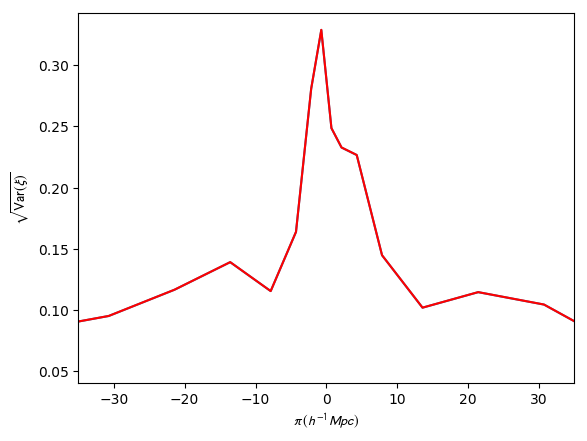

Detection significance = 2.778823 sigma
Detection significance = 2.751696 sigma
Detection significance = 2.830615 sigma
Detection significance = 2.776172 sigma
Detection significance = 3.013846 sigma
Detection significance = 3.100464 sigma


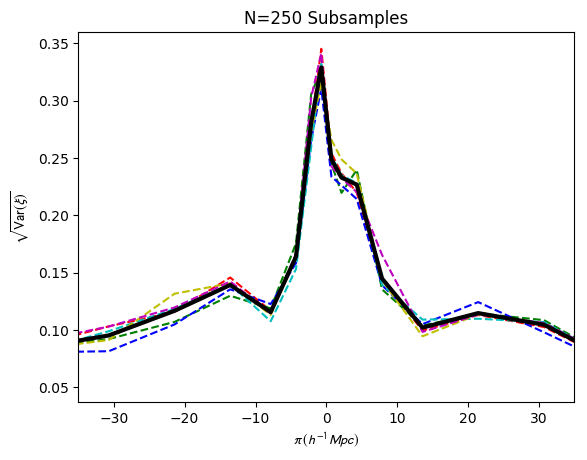

In [149]:
PiBins = np.empty(len(PiEdges)-1)

for i in np.arange(len(PiBins)):
    PiBins[i] = (PiEdges[i]+PiEdges[i+1])/2.

# Plot the covariances at sigma=0
XCorrSamples_sub = XCorrSamples_mosdef[0,:,:]
#print(np.shape(XCorrSamples_sub))

XCorr_sub = XCorr_mosdef[0,:]
Covar_sub = np.cov(XCorrSamples_sub)
Var_sub = np.diag(Covar_sub)

# Evaluate significance w.r.t. null
XNull_sub = XNull_mosdef[0,:]
InvCov_sub = np.linalg.pinv(Covar_sub)
DeltaVec_sub = XCorr_sub - XNull_sub
minusLogL = 0.5 * np.dot(DeltaVec_sub.transpose(), np.dot(InvCov_sub, DeltaVec_sub))
print("Detection significance (full samples)= %f sigma" % np.sqrt(minusLogL))

# fig, ax = plt.subplots()
# ax.errorbar(PiBins, XCorr_sub, yerr=np.sqrt(Var_sub), marker='o')
# ax.plot(PiBins, XNull_sub)
# ax.set_xlim((-20,20))
# ax.set_title('MOSDEF')
# ax.set_ylabel(r'$\xi$')
# ax.set_xlabel(r'$\pi\, (h^{-1} Mpc)$')
# plt.show()

# Compare with the diagonal of the full covariance
XCorrSamples_full = copy.deepcopy(XCorrSamples_mosdef)
XSamp_full = XCorrSamples_full.reshape(-1, XCorrSamples_full.shape[-1])
Covar_full = np.cov(XSamp_full, ddof=0)
Var_full = np.diag(Covar_full)

Var_fullsub = np.empty(16)
for i in np.arange(16):
    Var_fullsub[i]=Var_full[np.ravel_multi_index((0,i), (9,16))]
    
fig, ax = plt.subplots()
ax.plot(PiBins, np.sqrt(Var_fullsub))
ax.plot(PiBins, np.sqrt(Var_sub), color='red')
ax.set_xlim((-35,35))
ax.set_xlabel(r'$\pi\, (h^{-1} Mpc)$')
ax.set_ylabel(r'$\sqrt{\mathrm{Var}(\xi)}$')
plt.show()

fig, ax = plt.subplots()
color_arr = ['r','g','b','c','y','m']
ax.set_xlim((-35,35))
ax.set_xlabel(r'$\pi\, (h^{-1} Mpc)$')
ax.set_ylabel(r'$\sqrt{\mathrm{Var}(\xi)}$')
ax.set_title('N=250 Subsamples')

for i in np.arange(6):
    XCorrSamples_tmp = XCorrSamples_mosdef[:,:,(i*250):(i*250+250)]
    XCorrSig0Tmp  = XCorrSamples_tmp[0,:,:]
    Covar_tmp = np.cov(XCorrSig0Tmp)
    InvCov_tmp = np.linalg.pinv(Covar_tmp)
    minusLogL = 0.5 * np.dot(DeltaVec_sub.transpose(), np.dot(InvCov_tmp, DeltaVec_sub))
    print("Detection significance = %f sigma" % np.sqrt(minusLogL))
    # Plot variance
    Var_tmp = np.diag(Covar_tmp)
    ax.plot(PiBins, np.sqrt(Var_tmp), color=color_arr[i],linestyle='--')

ax.plot(PiBins, np.sqrt(Var_sub),linewidth=3.,color='black')
plt.show()

#Compare the full covariance vs the subsampled


In [239]:
import sys
sys.version


'3.5.3 |Anaconda 4.4.0 (x86_64)| (default, Mar  6 2017, 12:15:08) \n[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]'